<a href="https://colab.research.google.com/github/ToyTeX/NumericalNotebooks/blob/main/MorseReconSimp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

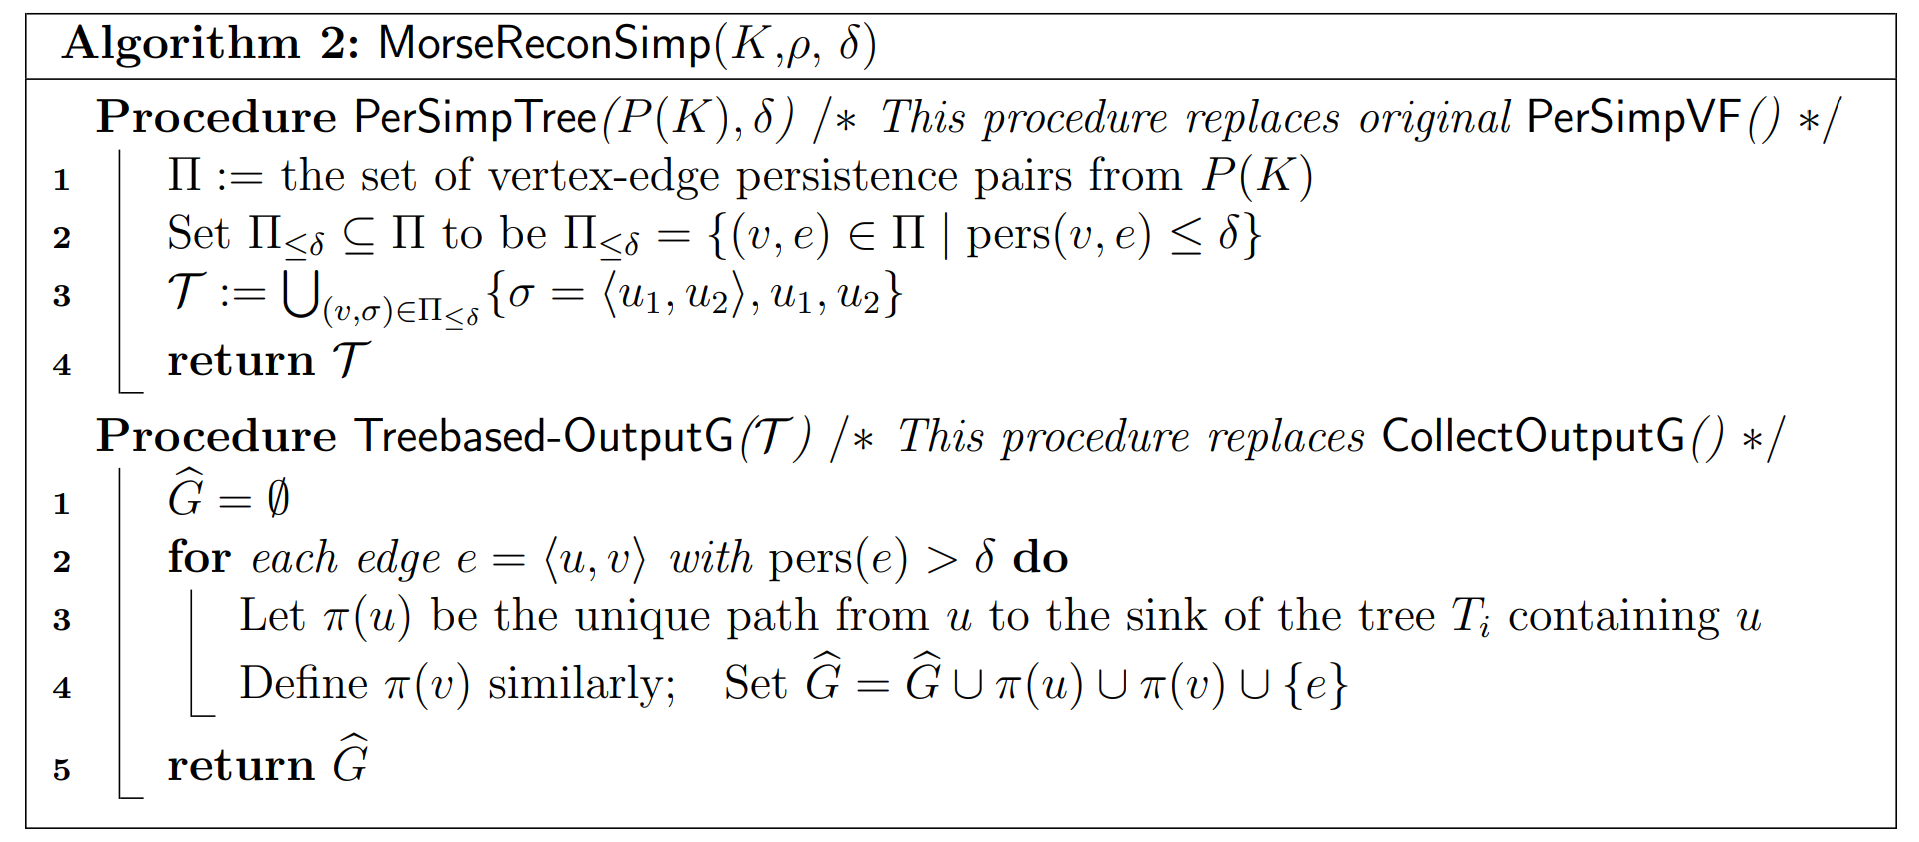

- A simplicial complex $K$ .  

- A persistence pairing $P(K)$  with edges and vertices.

- A function pers$(x)$ giving persistence value for a pair or an edge.

(mock data)

In [ ]:
pip install networkx matplotlib


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Mock persistence pair structure
# (vertex, edge) with pers(vertex, edge)
persistence_pairs = [
    ('a', ('a', 'b'), 0.2),
    ('b', ('b', 'c'), 0.3),
    ('d', ('d', 'e'), 0.1),
    ('f', ('f', 'g'), 0.4)
]

# PerSimTree: extract tree from low-persistence pairs
def PerSimpTree(persistence_pairs, delta):
    T_edges = set()
    all_nodes = set()
    for v, e, p in persistence_pairs:
        u1, u2 = e
        all_nodes.add(u1)
        all_nodes.add(u2)
        if p <= delta:
            # add sigma = <u1, u2>, u1, u2
            T_edges.add((u1, u2))
    forest = nx.Graph()
    forest.add_nodes_from(all_nodes)
    forest.add_edges_from(T_edges)
    return forest

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Treebased OutputG
def Treebased_OutputG(T, persistence_edges, delta):
    # Construct forest from T
    forest = nx.Graph()
    forest.add_nodes_from(T.nodes()) # Add nodes from T
    forest.add_edges_from(T.edges()) # Add edges from T

    G_hat = nx.Graph()
    for (u, v), p in persistence_edges:
        if p > delta:
            # find path from u to tree sink in its tree
            try:
                # Use shortest_path for pathfinding
                pi_u_dict = nx.shortest_path(forest, source=u)
                pi_v_dict = nx.shortest_path(forest, source=v)

                # Add path edges from all paths found from u and v
                for target, path in pi_u_dict.items():
                    for i in range(len(path) - 1):
                        G_hat.add_edge(path[i], path[i+1])

                for target, path in pi_v_dict.items():
                    for i in range(len(path) - 1):
                        G_hat.add_edge(path[i], path[i+1])

            except nx.NetworkXNoPath:
                # If no path from source to any other node, add the source node itself
                if u in forest:
                    G_hat.add_node(u)
                if v in forest:
                    G_hat.add_node(v)
            except nx.NodeNotFound:
                # Handle case where source node is not in the forest - add the node if it exists
                 if u in forest:
                    G_hat.add_node(u)
                 if v in forest:
                    G_hat.add_node(v)


            # Only add the edge (u,v) if both nodes are in the forest
            if u in forest and v in forest:
                G_hat.add_edge(u, v)
    return G_hat

In [ ]:
# Example usage
delta = 0.25
T = PerSimpTree(persistence_pairs, delta)

# Mock all persistence edges
persistence_edges = [(e, p) for _, e, p in persistence_pairs]





In [ ]:
# Reconstruct high persistence graph
G_hat = Treebased_OutputG(T, persistence_edges, delta)

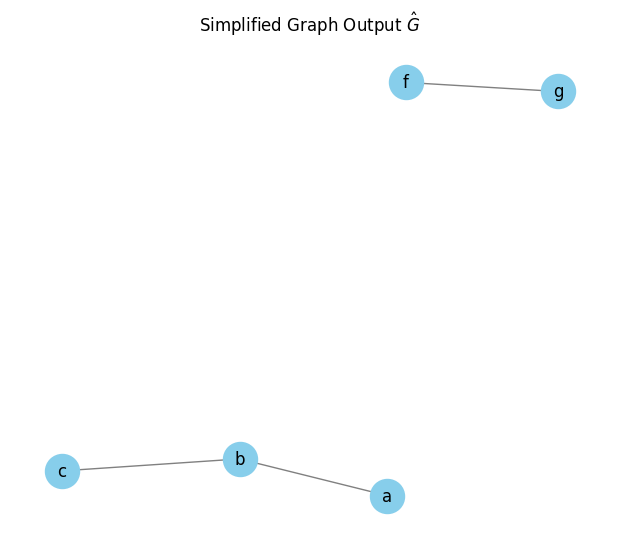

In [ ]:
# Visualization
pos = nx.spring_layout(G_hat)
plt.figure(figsize=(6, 5))
nx.draw(G_hat, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=600)
plt.title("Simplified Graph Output $\\hat{G}$")
plt.show()